In [197]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [198]:
# Target Accounts
targets = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]


# Variables for holding sentiments
sentiments = []
results_list = []

# Variable for max_id
oldest_tweet = None

for target in targets:
    # Counter
    counter = 1
    
     # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
   

    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

            # Get all tweets from home feed
            public_tweets = api.user_timeline(target, max_id = oldest_tweet)

            # Loop through all tweets 
            for tweet in public_tweets:

                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
                oldest_tweet = tweet['id'] - 1
                

            # Add sentiments for each tweet into a list
                sentiments.append({"News Organization": target,
                   "Compound": compound,
                   "Positive": pos,
                   "Negative": neu,
                   "Neutral": neg,
                   "Tweets Ago": counter})
                
                # Add each value to the appropriate list
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)

                # Add to counter 
                counter += 1
                
    sentiment_mean = {
        "News Organization": target,
        "Compound": np.mean(compound_list),
        "Positive": np.mean(positive_list),
        "Neutral": np.mean(negative_list),
        "Negative": np.mean(neutral_list),
        "Tweet Count": len(compound_list)
    }
    results_list.append(sentiment_mean)
       

In [199]:
 # Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Negative,Neutral,News Organization,Positive,Tweets Ago
0,0.0000,1.000,0.000,@BBCWorld,0.000,1
1,0.7650,0.593,0.081,@BBCWorld,0.326,2
2,0.0000,1.000,0.000,@BBCWorld,0.000,3
3,-0.7269,0.621,0.379,@BBCWorld,0.000,4
4,-0.7506,0.522,0.478,@BBCWorld,0.000,5


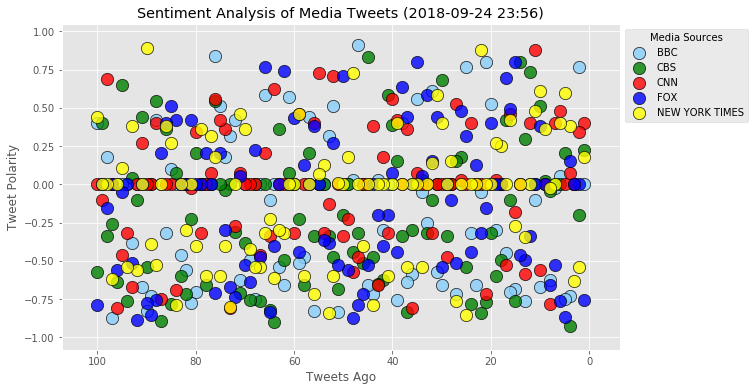

In [283]:
users = sentiments_pd['News Organization'].unique()
colors = [ 'lightskyblue','green' ,'red' , 'blue','yellow']
news_org= ["BBC", "CBS" , "CNN" , "FOX" , "NEW YORK TIMES"]
scale=150

for i in range(len(users)):
    plt.scatter(x=sentiments_pd[sentiments_pd['News Organization']==users[i]]['Tweets Ago'].values,
                y=sentiments_pd[sentiments_pd['News Organization']==users[i]]['Compound'].values,
                color = colors[i], label = news_org[i], alpha = 0.8, edgecolor = 'black', linewidth = .8 , s=scale)
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.legend(title="Media Sources",bbox_to_anchor=(1,1), loc="upper left" )
plt.gcf().set_size_inches(10, 6)
plt.gca().invert_xaxis()
major_ticks = np.arange(-1, 1.5, .5)
ax.set_yticks(major_ticks)
ax.grid(which='major', alpha=0.5)

plt.savefig("Sentiment_Analysis_Of_Media_Tweets.png")
plt.show()




In [220]:
 news_df =pd.DataFrame(results_list).head()
news_df

,Compound,Negative,Neutral,News Organization,Positive,Tweet Count
0,-0.136046,0.75856,0.15964,@BBCWorld,0.08179,100
1,-0.167124,0.78516,0.14641,@CBSNews,0.06845,100
2,-0.016058,0.86905,0.06776,@CNN,0.06318,100
3,-0.108918,0.80528,0.12564,@FoxNews,0.06908,100
4,-0.066311,0.85182,0.08296,@nytimes,0.06521,100


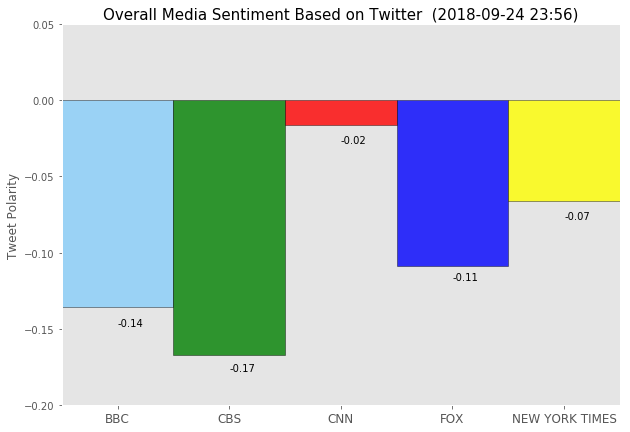

In [282]:
# create color palette
colors =  [ 'lightskyblue','green' ,'red' , 'blue','yellow']
news_org= ["BBC", "CBS" , "CNN" , "FOX" , "NEW YORK TIMES"]
x_values = np.arange(len(news_df))
plt.figure(figsize=(10, 7))
barlist=plt.bar(x_values, news_df["Compound"], alpha=0.8, align='center', width=1 , color = colors , edgecolor = "black")
plt.xticks(x_values, news_org , rotation="horizontal" , fontsize = 12)
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
# add labels and set the xlim
plt.ylabel("Tweet Polarity" , fontsize = 12)
plt.title(f"Overall Media Sentiment Based on Twitter  ({now})" , fontsize = 15)
          
plt.xlim(-.5, len(x_axis)-.5)
plt.ylim(-.2, .05)

plt.grid()
for a,b in zip(x, y):
    plt.text(a, b - .008, str(b) )

# save the figure and show the plot
plt.savefig("news_df.png")
plt.show()
